In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings

filterwarnings("ignore")

train_data = pd.read_csv(r'C:/Users/legion/Desktop/flight_prediction/dataset/flightdata.csv')
print(train_data.head())
print(train_data.info())
print(train_data.isnull().sum())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 

#### 1. Data Cleaning

In [229]:
#1. Data Cleaning
# Handeling missing value.
train_data['Total_Stops'].isnull()
print(train_data[train_data['Total_Stops'].isnull()])

train_data.dropna(inplace=True) #Remove the missing value from the rows that have it
print(train_data.isnull().sum()) 

# print(train_data.dtypes) #Objects are similar to the strings but in pandas. 

# Int64 has length of 64  and can store both +ve and -ve values as it is signed value.

#2. Convert into date and times that is to number for model
def change_into_Datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

print(train_data.dtypes)

#Seperate day,month and year.
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month
train_data['Journey_year'] = train_data['Date_of_Journey'].dt.year
print(train_data.head(3))

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64
Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      

In [230]:
#3. Extract Dervied Attributes
def extract_hour_min(df, col):
    df[col+"_hour"] =df[col].dt.hour
    df[col+"_minute"] =df[col].dt.minute

extract_hour_min(train_data,'Dep_Time')
extract_hour_min(train_data,'Arrival_Time')

# print(train_data.head(3))

cols_to_drop = ['Arrival_Time','Dep_Time']
train_data.drop(cols_to_drop,axis=1,inplace=True) # Drop columns axis=1

print(train_data.head(3))

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR ? DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL ? LKO ? BOM ? COK   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   

   Journey_year  Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  \
0          2019             22               20                  1   
1          2019              5               50                 13   
2          2019              9               25                  4   

   Arrival_Time_minute  
0                   10  
1                   15  
2                 

#### 2.Data Analysis

Axes(0.125,0.11;0.775x0.77)


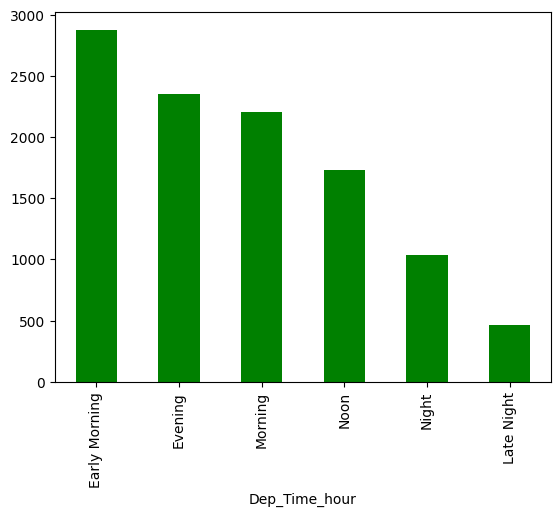

In [231]:
# Analyis of Data 
# Scenario: lets analyse when will most of the flights will take-off
#--> We can know the time with the help of departure so

def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"
    
train_data['Dep_Time_hour'].apply(flight_dep_time)
print(train_data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="green")) # This is simple pandas plot

In [232]:
# import plotly
# import cufflinks as cf
# from cufflinks.offline import go_offline
# from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
# init_notebook_mode(connected=True) # Set notebook mode in offline mode.
# cf.go_offline()
# print(train_data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")) # This is simple plotlyplot


In [233]:
# Preprocessing Duration Feature(column):

# Duration might have some hours missing or some min missing so refine it

def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    
    return x

train_data['Duration'] = train_data['Duration'].apply(preprocess_duration)
print(train_data['Duration'])

#Lets extract hour and minute value only also in integer from string 
train_data['Duration_hours'] = train_data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1])) #for all row means x by the help of lamda
train_data['Duration_mins'] = train_data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))
print(train_data.head(3))

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR ? DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL ? LKO ? BOM ? COK   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2   19h 0m     2 stops         No info  13882            9              6   

   Journey_year  Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  \
0          2019             22               20                  1   
1          20

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object
0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')
Axes(0.125,0.11;0.775x0.77)


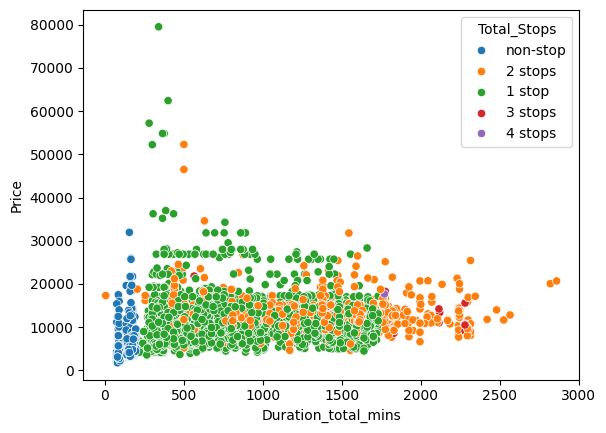

In [234]:
#Analyse that duration will effect price or not?
print(train_data['Duration'])
train_data['Duration_total_mins']= train_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
print(train_data['Duration_total_mins'])
print(train_data.columns)
print(sns.scatterplot(x = 'Duration_total_mins', y='Price',hue="Total_Stops" ,data=train_data))


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')


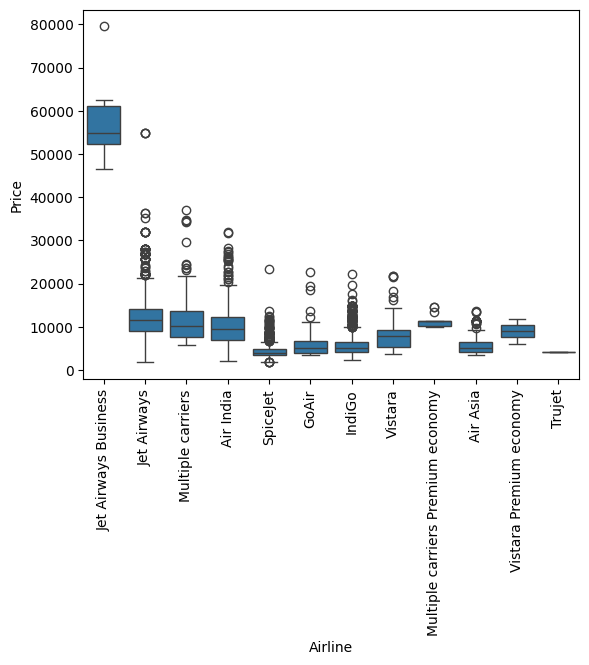

In [235]:
## 8.. on which route Jet Airways is extremely used?
train_data['Airline']=='Jet Airways'
train_data[train_data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

##8.1 Box Plot
print(train_data.columns)
sns.boxplot(y='Price', x='Airline', data=train_data.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical") #To handle overlapping issue rotate it through a axis.
plt.show()


#### 3. Feature Engineering

In [236]:
# Main aim to convert string into numbers(For layman understanding.)
# nominal data = its not in any order = use ohe
#ordinal data = order (eg. good,better,best) = label encoding

#### i. OHE

In [237]:
cat_col = print([col for col in train_data.columns if train_data[col].dtype=="object"])
num_col = print([col for col in train_data.columns if train_data[col].dtype!="object"])

['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info']
['Date_of_Journey', 'Price', 'Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_mins', 'Duration_total_mins']


In [238]:
print(train_data['Source'].unique())
#Instead of importing ohe from sklearn.preprocessing lets encode it from scratch.
train_data['Source'].apply(lambda x:1 if x=='Banglore' else 0)
for sub_category in train_data['Source'].unique():
    train_data['Source_'+sub_category]= train_data['Source'].apply(lambda x:1 if x==sub_category else 0)

print(train_data.head(3))

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR ? DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL ? LKO ? BOM ? COK   

  Duration Total_Stops Additional_Info  Price  Journey_day  ...  \
0   2h 50m    non-stop         No info   3897           24  ...   
1   7h 25m     2 stops         No info   7662            1  ...   
2   19h 0m     2 stops         No info  13882            9  ...   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_mins  \
0                  1                   10               2             50   
1                 13                   15               7             25   
2                  4                   25              19              0   

   Duration_total_mins  Source_Banglore  Source_Kolkata  So

#### ii. Target Guided

In [239]:
train_data['Airline'].nunique()

12

In [240]:
## We have a lot of subcategories and that is responsible for cause curse of diminesion and ohe cant be used
### Use target guided encoding here.(in our case we have target== price so use price column to encode the airline column)

train_data.groupby(['Airline'])['Price'].mean().sort_values()
airlines = train_data.groupby(['Airline'])['Price'].mean().sort_values().index

In [241]:
# Use enumeration enumerate(airlines) use simple for loop i.e for index,key in enum(airlines) 
dict_airlines={key:index for index,key in enumerate(airlines,0)}
train_data['Airline']=train_data['Airline'].map(dict_airlines)
print(train_data.head(3))

train_data['Destination'].unique()

   Airline Date_of_Journey    Source Destination                  Route  \
0        3      2019-03-24  Banglore   New Delhi              BLR ? DEL   
1        7      2019-05-01   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2       10      2019-06-09     Delhi      Cochin  DEL ? LKO ? BOM ? COK   

  Duration Total_Stops Additional_Info  Price  Journey_day  ...  \
0   2h 50m    non-stop         No info   3897           24  ...   
1   7h 25m     2 stops         No info   7662            1  ...   
2   19h 0m     2 stops         No info  13882            9  ...   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_mins  \
0                  1                   10               2             50   
1                 13                   15               7             25   
2                  4                   25              19              0   

   Duration_total_mins  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1             

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [242]:
train_data['Destination'].replace('New Delhi', 'Delhi', inplace=True)
dest = train_data.groupby(['Destination'])['Price'].mean().sort_values().index
dict_dest={key:index for index , key in enumerate(dest,0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [243]:
train_data['Destination']=train_data['Destination'].map(dict_dest)
print(train_data.head(3))
# print(train_data['Destination'].dtype)

   Airline Date_of_Journey    Source  Destination                  Route  \
0        3      2019-03-24  Banglore            2              BLR ? DEL   
1        7      2019-05-01   Kolkata            3  CCU ? IXR ? BBI ? BLR   
2       10      2019-06-09     Delhi            4  DEL ? LKO ? BOM ? COK   

  Duration Total_Stops Additional_Info  Price  Journey_day  ...  \
0   2h 50m    non-stop         No info   3897           24  ...   
1   7h 25m     2 stops         No info   7662            1  ...   
2   19h 0m     2 stops         No info  13882            9  ...   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_mins  \
0                  1                   10               2             50   
1                 13                   15               7             25   
2                  4                   25              19              0   

   Duration_total_mins  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1         

#### iii. Manual Encoding(Label Encoding.)

In [244]:
## we can do manually or use sklearn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_data['Total_Stops'] = encoder.fit_transform(train_data['Total_Stops'])
print(train_data.head(3))


   Airline Date_of_Journey    Source  Destination                  Route  \
0        3      2019-03-24  Banglore            2              BLR ? DEL   
1        7      2019-05-01   Kolkata            3  CCU ? IXR ? BBI ? BLR   
2       10      2019-06-09     Delhi            4  DEL ? LKO ? BOM ? COK   

  Duration  Total_Stops Additional_Info  Price  Journey_day  ...  \
0   2h 50m            4         No info   3897           24  ...   
1   7h 25m            1         No info   7662            1  ...   
2   19h 0m            1         No info  13882            9  ...   

   Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_mins  \
0                  1                   10               2             50   
1                 13                   15               7             25   
2                  4                   25              19              0   

   Duration_total_mins  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1     

#### iv.Remove useless columns

In [245]:
print(train_data.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')


In [246]:
print(train_data['Additional_Info'].value_counts()/len(train_data)*100)

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64


In [247]:
# i can drop additional info because most of the datas are no info i.e. no inforamtion.
# Here total stops and route feature are related as 0 stops direct route and 2 stops 2 routes hence can drop route column as well.
# duration_total_mins and Date_of Journey also can be deleted as they have seperate columns

In [248]:

train_data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_year','Route','Duration'],axis=1,inplace=True)

#Also we have journey year that has constant value 2019 which doesnot make sense to machine learning so
print(train_data.columns)

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')


#### 4.Handeling Outliers

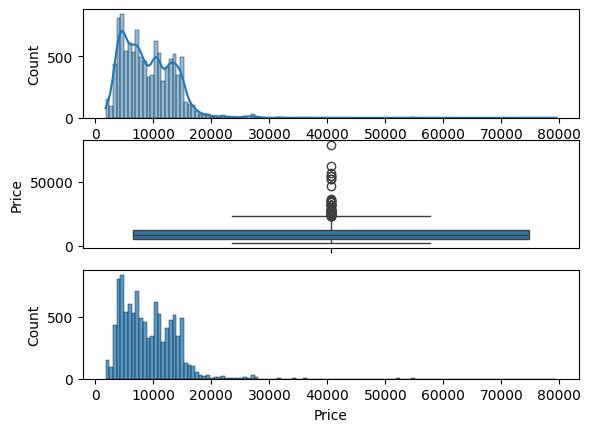

In [249]:
# We can observe Outliers from distribution table(histogram),Box Plot, histogram.

def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.histplot(df[col], ax=ax1, kde=True)
    sns.boxplot(df[col], ax=ax2)
    sns.histplot(df[col],ax=ax3)

plot(train_data, 'Price')


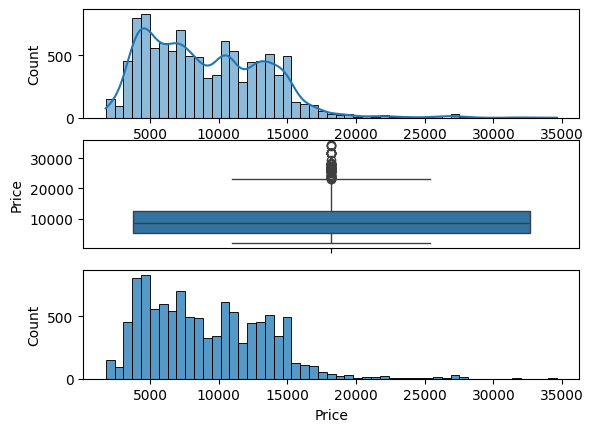

In [250]:
# Here it is left skewed as its shifted towards left so use IQR for this type
q1 = train_data['Price'].quantile(0.25)
q3 = train_data['Price'].quantile(0.75)

iqr = q3 -q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

#By observing boxplot lets say above 35k is outliers in the figure. Where is if else code in python
train_data['Price']=np.where(train_data['Price']>=35000, train_data['Price'].median(),train_data['Price'])
plot(train_data,'Price')


##### 5. Select Best Features Using Feature Selection

In [251]:
# Selections of best columns to determine target column.

# We will use mutual information apporach(two feature or random vars are related to eachother or not)
#It will return non-negative value which measures the dependency of two variables and if 0 they are mutually independent more value i.e. more close to 1 higher dependency
X = train_data.drop(['Price'],axis=1)
y = train_data['Price'] # Target Value.

from sklearn.feature_selection import mutual_info_regression
imp = mutual_info_regression(X,y)
print(imp)

imp_df = pd.DataFrame(imp, index=X.columns)
imp_df.columns = ['importance']
print(imp_df)

[1.32267164 1.06190433 0.78657359 0.37135167 0.62321913 0.92241329
 0.75479214 1.13491205 0.89448612 1.12551794 0.6774441  0.38352241
 0.45317103 0.52413542 0.1294181  0.2026533 ]
                     importance
Airline                1.322672
Destination            1.061904
Total_Stops            0.786574
Journey_day            0.371352
Journey_month          0.623219
Dep_Time_hour          0.922413
Dep_Time_minute        0.754792
Arrival_Time_hour      1.134912
Arrival_Time_minute    0.894486
Duration_hours         1.125518
Duration_mins          0.677444
Source_Banglore        0.383522
Source_Kolkata         0.453171
Source_Delhi           0.524135
Source_Chennai         0.129418
Source_Mumbai          0.202653


In [252]:
imp_df.sort_values(by= 'importance', ascending=False)

,importance
Airline,1.322672
Arrival_Time_hour,1.134912
Duration_hours,1.125518
Destination,1.061904
Dep_Time_hour,0.922413
Arrival_Time_minute,0.894486
Total_Stops,0.786574
Dep_Time_minute,0.754792
Duration_mins,0.677444
Journey_month,0.623219


#### 6. Model Building

In [253]:
# Any machine learning algorithm are of three types:
# 1. Regression 2. Classification 3.Clusturing
#1. Regression = prediction w.r.t that feature, which is numerical in nature e.g. prediciton of price of airline,salary of teacher,rating of pathao, revenue of particular company
#2. Classification = it should have some kind of labels and it will classify that e.g predicit a person is diabeitc or not , resturants listed on pathao are going to success or not
#3. Clusturing = grouping based upon similarity(e.g. can you list students with same intentions)


##### i. Train_Test_Split

In [254]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

##### ii. Using RandomForest Model as Regression 

In [255]:
from sklearn.ensemble import RandomForestRegressor
#1. Initialize model
ml_model = RandomForestRegressor()

#2. Fit the model with train data 
ml_model.fit(X_train, y_train)

#3. build the model
y_pred = ml_model.predict(X_test)

print(y_pred)


[16845.18  5456.19  8829.03 ...  3511.33  6409.06  6821.56]


##### iii. Evaluating the Model

In [256]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.8119003393484354

##### Here the accuracy of this model is 80% Hurray!!!

#### 7. Dump the Model

In [257]:
import pickle
file = open('rf_random.pkl','wb')
pickle.dump(ml_model , file)

model = open(r'rf_random.pkl','rb')

forest = pickle.load(model)
forest.predict(X_test)

y_pred2 = forest.predict(X_test)
metrics.r2_score(y_test,y_pred2)

0.8119003393484354

#### 8. MAPE(Mean abs % error)

In [258]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

mape(y_test,y_pred)

np.float64(13.17128637434936)

#### 9. Automation of Machine Learning Pipeline

Training score : 0.9510892117129682
predictions are : [16876.61  5345.85  8710.56 ...  3531.21  6293.83  6889.62]


r2 score : 0.8096675539971421
MAE : 1176.9279558701626
MSE : 3705315.862125737
RMSE : 1924.9197027735306
MAPE : 13.17376679071377


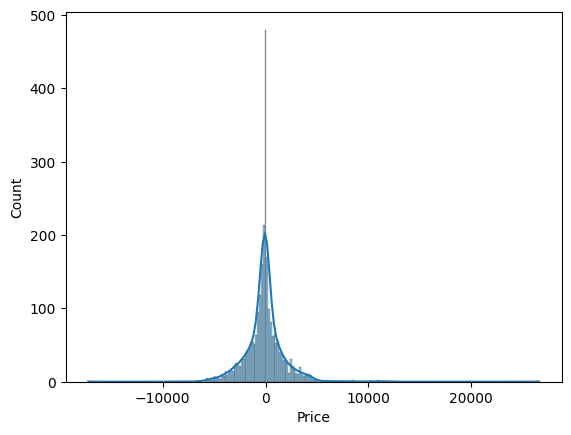

In [ ]:
from sklearn import metrics

def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_predction = model.predict(X_test)
    print('predictions are : {}'.format(y_predction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_predction)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test,y_predction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predction))))
    print('MAPE : {}'.format(mape(y_test,y_predction)))
    sns.histplot(y_test - y_predction,kde=True)

#Pass any machine learning algorithm and get result hurrayyy!!
predict(RandomForestRegressor())


#### 10. Hypertune the Machine Learning Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

reg_rf = RandomizedSearchCV()

np.linspace(start= 100, stop= 1200, num= 6) # Evenly distibuted numbers in range
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 1200, num= 6)] # for Number of trees that you have in random forest

max_features = ["auto","sqrt"] # for max features that can split
